In [19]:
import pandas as pd

In [20]:
df = pd.read_csv('./president_heights.csv')
df.head(10)

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [21]:
df2 = df.tail(10)
df2

,order,name,height(cm)
32,35,John F. Kennedy,183
33,36,Lyndon B. Johnson,193
34,37,Richard Nixon,182
35,38,Gerald Ford,183
36,39,Jimmy Carter,177
37,40,Ronald Reagan,185
38,41,George H. W. Bush,188
39,42,Bill Clinton,188
40,43,George W. Bush,182
41,44,Barack Obama,185


In [22]:
df1 = df.head(len(df) - 10)
df1

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183
5,6,John Quincy Adams,171
6,7,Andrew Jackson,185
7,8,Martin Van Buren,168
8,9,William Henry Harrison,173
9,10,John Tyler,183


In [25]:
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import pandas as pd
df1.mean()

order          17.15625
height(cm)    178.21875
dtype: float64

In [26]:
df2.mean()

order          39.5
height(cm)    184.6
dtype: float64

In [32]:
df1.describe()

,order,height(cm)
count,32.000000,32.000000
mean,17.156250,178.218750
std,10.169878,7.042426
min,1.000000,163.000000
25%,8.750000,173.000000
50%,16.500000,178.000000
75%,26.250000,183.000000
max,34.000000,193.000000


In [33]:
df2.describe()

,order,height(cm)
count,10.00000,10.000000
mean,39.50000,184.600000
std,3.02765,4.351245
min,35.00000,177.000000
25%,37.25000,182.250000
50%,39.50000,184.000000
75%,41.75000,187.250000
max,44.00000,193.000000


In [34]:
import numpy as np
from scipy import stats

# two sample, 單尾 假設檢定
s1 = df1['height(cm)']
s2 = df2['height(cm)']


In [35]:
import scipy.stats
scipy.stats.shapiro(s1)


ShapiroResult(statistic=0.9794741272926331, pvalue=0.7841688990592957)

In [36]:
scipy.stats.shapiro(s2)

ShapiroResult(statistic=0.9562674164772034, pvalue=0.7426198124885559)

In [37]:
scipy.stats.levene(s1,s2, center = 'mean')

LeveneResult(statistic=3.52841595590035, pvalue=0.06762783322561909)

In [38]:
# H0: s2 <= s1
# H0: s2 > s1


In [39]:
print(s1.var()) # ddof=0

49.595766129032256


In [40]:
print(s2.var()) # ddof=0

18.93333333333333


In [41]:
print(s1.std())
print(s1.std(ddof=0))
print(s2.std())
print(s2.std(ddof=0))

7.04242615360873
6.931514873207732
4.351245032554858
4.127953488110059


t-statistic:143.1548547740345
p-value:1.3426983592642691e-45


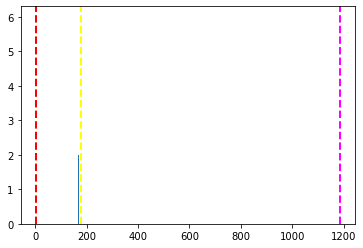

In [45]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test, alternative='greater': 右尾檢定
t,p = stats.ttest_1samp(s1, 0, alternative='greater')
## 不須除以2。
p1 = p
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.10)
plt.hist(s1, bins=100)
# show the hypothesized population mean
plt.axvline(s1.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(s1.mean() + t*s1.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:2.773584905660377
p-value:0.003910863257949543


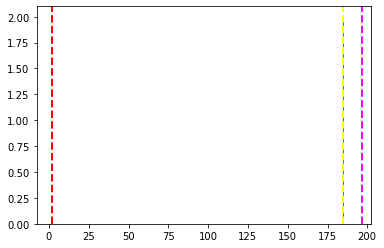

In [53]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test, alternative='greater': 右尾檢定
t,p = stats.ttest_1samp(s1, 0, alternative='greater')
## 不須除以2。
p1 = p
print ("t-statistic:" + str(t))
print("p-value:" + str(p1))

# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, 0, 1.10)
plt.hist(s2, bins=100)
# show the hypothesized population mean
plt.axvline(s2.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(s2.mean() + t*s2.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

t-statistic:143.1548547740345
p-value:0.000000


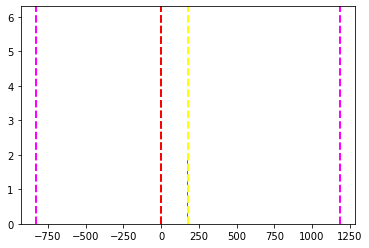

In [48]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# T-Test
t,p = stats.ttest_1samp(s1, 0)#1samp單邊檢定
print ("t-statistic:" + str(t))
# ttest_1samp is 2-tailed
print("p-value:" + '%f' % p)
# calculate a 95% confidence interval. 50% of the probability is outside this, 2.5% in each tail
ci = stats.norm.interval(0.95, 0, 1.15)
plt.hist(s1, bins=100)
# show the hypothesized population mean
plt.axvline(s1.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the confidence interval thresholds - 5% of propbability is under the curve outside these.
plt.axvline(ci[0], color='red', linestyle='dashed', linewidth=2)
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic thresholds - the p-value is the area under the curve outside these
plt.axvline(s1.mean() - t*s1.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(s1.mean() + t*s1.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()

non-math sample mean:66.04066361023553
math sample mean:66.52069665713476
t-statistic:2.140008413392296
p-value:0.016789


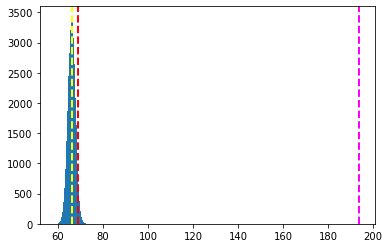

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

np.random.seed(123)
nonMath = np.random.normal(66.0, 1.5, 100)
math = np.random.normal(66.55, 1.5, 100)
print("non-math sample mean:" + str(nonMath.mean()))
print("math sample mean:" + str(math.mean()))

# Independent T-Test
t,p = stats.ttest_ind(math, nonMath)#無配對
# ttest_ind is 2-tailed, so half the resulting p-value to get a 1-tailed p-value
p1 = '%f' % (p/2)
print("t-statistic:" + str(t))
print("p-value:" + str(p1))

s1 = np.random.normal(nonMath.mean(), nonMath.std(), 100000)
# calculate a 90% confidence interval. 10% of the probability is outside this, 5% in each tail
ci = stats.norm.interval(0.90, nonMath.mean(), nonMath.std())
plt.hist(s1, bins=100)
# show the hypothesized population mean
plt.axvline(s1.mean(), color='yellow', linestyle='dashed', linewidth=2)
# show the right-tail confidence interval threshold - 5% of propbability is under the curve to the right of this.
plt.axvline(ci[1], color='red', linestyle='dashed', linewidth=2)
# show the t-statistic - the p-value is the area under the curve to the right of this
plt.axvline(s2.mean() + t*s2.std(), color='magenta', linestyle='dashed', linewidth=2)
plt.show()